# **Meta 1**

Incluir modelo de sensor de alcance (sonar) no robô simulado.
Implementar telecomando do robô a partir do teclado, de modo a
controlar o seu movimento para frente ou para trás e para a direita
ou para a esquerda. O simulador deve apresentar nova tela com as
medições obtidas pelo sensor de alcance a partir dos obstáculos
detectados pelo mesmo em função do tempo, assim como a posição
(x,y) em função do tempo

Obs.: Inserir as seguintes linhas ao script do robô para ser desenhado o caminho

```lua
--lua

sim = require('sim')

function sysCall_init()
    robot = sim.getObject('.')
    robotTrace = sim.addDrawingObject(sim.drawing_linestrip + sim.drawing_cyclic, 8, 0, -1, 400, {1, 1, 0}, nil, nil, {1, 1, 0})
end

function sysCall_sensing()
    local p = sim.getObjectPosition(robot)
    p[3]=0
    sim.addDrawingObjectItem(robotTrace, p)
end 
```


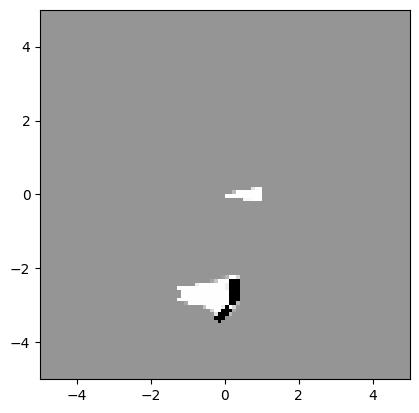

In [1]:
from RobotLibrary import *

print('Program started')
sim.simxFinish(-1)
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)

if clientID != -1:
    print('Connected to remote API server')
    try:
        controller = RobotController(clientID)

        controller.manual_control_loop()
        controller.plot_occupancy_grid()        
        
    except Exception as e:
        print(f"An error occurred: {e}")

    sim.simxFinish(clientID)
else:
    print('Failed connecting to remote API server')

print('Program ended')

# **Meta 2**

Program started
Connected to remote API server


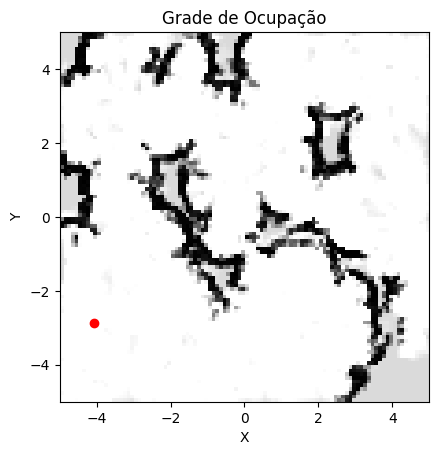

Program ended


In [2]:
from RobotLibrary import *

print('Program started')
sim.simxFinish(-1)
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)

if clientID != -1:
    print('Connected to remote API server')
    try:
        controller = RobotController(clientID)
        
        # controller.get_map_file("peoplemap.npy")
        controller.manual_control_loop()
        # controller.save_map_file("peoplemap")       
        
        # controller.get_map_file("peoplemap.npy")
        # controller.plot_occupancy_grid()
    except Exception as e:
        print(f"An error occurred: {e}")

    sim.simxFinish(clientID)
else:
    print('Failed connecting to remote API server')

print('Program ended')

Program started
Connected to remote API server
0.0 0.0
0.001920392969623208
-4.105439186096191 -2.8827786445617676
0.001917141256853938
(78, 76, 74, 72, 70, 68, 66, 64, 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 20, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 19, 21, 23, 25, 27, 29, 30, 29, 30)


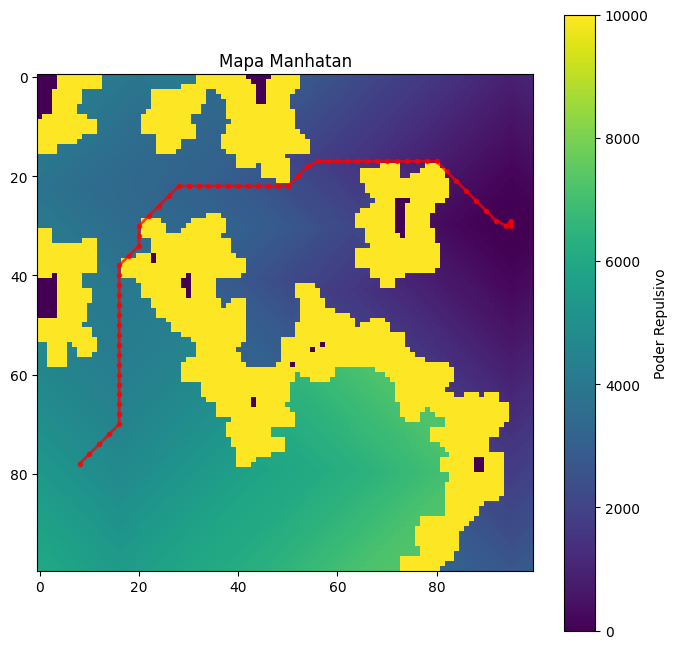

Program ended


In [1]:
from RobotLibrary import *

print('Program started')
sim.simxFinish(-1)
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)

if clientID != -1:
    print('Connected to remote API server')
    try:
        controller = RobotController(clientID)
        
        # controller.get_map_file("peoplemap.npy")
        # controller.manual_control_loop()
        # controller.save_map_file("peoplemap")       
        
        controller.get_map_file("peoplemap.npy")

        controller.set_goal(np.array([4.5,2,0]))

        controller.mark_occupied()
        controller.get_generated_path_manha_occ(True)
        controller.send_generated_path()
        controller.control_loop(400)
        controller.plot_caminho()
        
        # plt.figure(figsize=(8, 8))
        # plt.imshow(controller.occgrid, cmap='Greys', interpolation='nearest')
        # plt.title('Occupancy Grid')
        # plt.colorbar(label='Occupancy (1 = Occupied, 0 = Unoccupied)')
        # plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

    sim.simxFinish(clientID)
else:
    print('Failed connecting to remote API server')

print('Program ended')